In [ ]:
import pykitti

basedir = '/your/dataset/dir'
date = '2011_09_26'
drive = '0019'

# The 'frames' argument is optional - default: None, which loads the whole dataset.
# Calibration, timestamps, and IMU data are read automatically. 
# Camera and velodyne data are available via properties that create generators
# when accessed, or through getter methods that provide random access.
data = pykitti.raw(basedir, date, drive, frames=range(0, 50, 5))

# dataset.calib:         Calibration data are accessible as a named tuple
# dataset.timestamps:    Timestamps are parsed into a list of datetime objects
# dataset.oxts:          List of OXTS packets and 6-dof poses as named tuples
# dataset.camN:          Returns a generator that loads individual images from camera N
# dataset.get_camN(idx): Returns the image from camera N at idx  
# dataset.gray:          Returns a generator that loads monochrome stereo pairs (cam0, cam1)
# dataset.get_gray(idx): Returns the monochrome stereo pair at idx  
# dataset.rgb:           Returns a generator that loads RGB stereo pairs (cam2, cam3)
# dataset.get_rgb(idx):  Returns the RGB stereo pair at idx  
# dataset.velo:          Returns a generator that loads velodyne scans as [x,y,z,reflectance]
# dataset.get_velo(idx): Returns the velodyne scan at idx  


point_velo = np.array([0,0,0,1])
point_cam0 = data.calib.T_cam0_velo.dot(point_velo)

point_imu = np.array([0,0,0,1])
point_w = [o.T_w_imu.dot(point_imu) for o in data.oxts]

for cam0_image in data.cam0:
    # do something
    pass

cam2_image, cam3_image = data.get_rgb(3)

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt

In [5]:
DATA_DIR = "./../../DLAV-course/Project DLAV/data project/KITTI dataset 12GB" # path to the datasets
images_tr = []
images_te = []

for filename in os.listdir(DATA_DIR + "/training/image_2"):
    if filename.endswith(".png"):
        img = Image.open(os.path.join(DATA_DIR + "/training/image_2", filename))
        images_tr.append(img)


In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "./../DLAV-course/Project DLAV/data project/KITTI dataset 12GB" # path to the datasets
images_tr = []
images_te = []

for filename in os.listdir(DATA_DIR + "/training/image_2"):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(DATA_DIR + "/training/image_2", filename))
        images_tr.append(img)

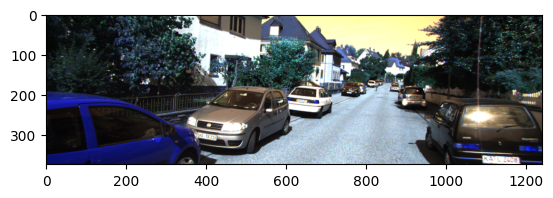

In [3]:
img = images_tr[8]
plt.imshow(img)

In [4]:
for filename_te in os.listdir(DATA_DIR + "/testing/image_2"):
    if filename_te.endswith(".png"):
        img = cv2.imread(os.path.join(DATA_DIR + "/testing/image_2", filename_te))
        images_te.append(img)

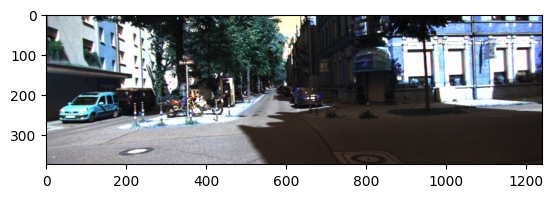

In [5]:
img = images_te[8]
plt.imshow(img)

In [6]:
print(f"Number of images in training set:{len(images_tr)}\n")
print(f"Number of images in testing set:{len(images_te)}")

Number of images in training set:7481

Number of images in testing set:7518
